# Análisis de datos extraídos de Twitter

En este cuaderno se muestra el análisis y las series de tiempo de los datos extraídos de Twitter.


Primero, importamos las bibliotecas con las que vamos a trabajar:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Las consultas se dividieron en 6 grupos. Primero mostramos la relación de los tweets totales extraídos desde marzo 2020 hasta mayo 2021, luego se hace la presentación individual por grupo. 

## Búsqueda general


En principio, se cargan los datos que se encuentran de un archivo .CSV.; luego se pide su forma para estar al tanto de cuantos tweets se recaudaron en total. 

In [2]:
df = pd.read_csv('../datos/datos_twitter/data.csv', parse_dates=['created_at'])
df.shape 

(2560, 2)

Eliminamos las filas que sean iguales ya que representan tweets repetidos.

In [3]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28T23:17:21+00:00,Venezuela: el país donde el fiscal general qui...
1,2021-04-26T05:21:31+00:00,"@the_efosa Hi, I'm a desperate son loocking fo..."
2,2021-04-19T05:30:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
3,2021-04-19T02:08:17+00:00,"Aún falta mucho, todavía los familiares de Ani..."
4,2021-04-18T22:00:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
...,...,...
2554,2021-04-07T11:13:40+00:00,Que bueno tener y usar la palabra preferida de...
2555,2021-04-06T03:44:08+00:00,Ayudemos a mi padrino Hector a superar el COVI...
2556,2021-04-04T18:00:02+00:00,Agradecido con el llamado de solidaridad en co...
2557,2021-04-04T03:55:58+00:00,@R_MarcoTorres @NicolasMaduro @johanitakenpo @...


La siguiente función hace la conversión de la columna "created_ad" a un formato específico para ser utilizado en las series de tiempo, luego agrupa las entradas de cada día y la convierte en una serie de tiempo.

In [4]:
def counts_time_series(df):
    '''Convertir la columna a fecha'''
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d', errors='coerce')
    
    '''Agrupa por el dia y cuenta el numero de entradas con ese dia'''
    time_series_with_counts = df.groupby(df['created_at'].dt.floor('d')).size()
    
    #'''Remover las filas que sean iguales'''
    #time_series_with_counts.drop_duplicates(keep='first')

    return time_series_with_counts

In [5]:
twitter_time_series =  counts_time_series(df)

In [6]:
sns.set(rc={'figure.figsize':(11, 5)}) 

En total se extraen 2560 tweets, luego de remover los tweets duplicados, queda un total de 2429, los cuales se distribuyen de la siguiente manera: 

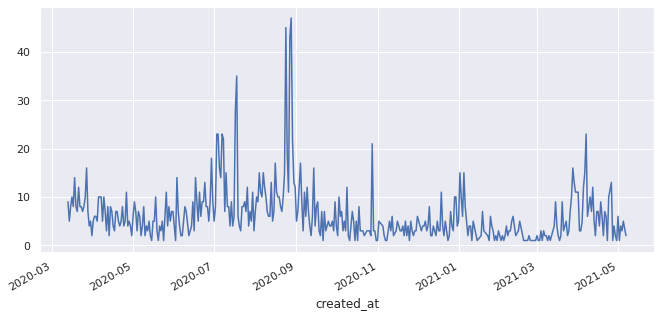

In [7]:

serie_total = twitter_time_series.plot()

### Grupo 1

- infectado covid-19
- muerte covid-19

In [8]:
grupo_1 = pd.read_csv('../datos/datos_twitter/twitter_1_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
grupo_1.shape 

(365, 2)

In [9]:
grupo_1.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28 11:18:54+00:00,Sumado al dolor por la muerte de Aristóbulo Is...
1,2021-04-27 13:53:51+00:00,Muy triste por la muerte del profesor Andrés S...
2,2021-04-24 17:18:23+00:00,@eloscarale *disminuye las probabilidades de c...
3,2021-04-24 14:23:13+00:00,"Éste capítulo se llama ""Danzando alrededor de ..."
4,2021-04-20 00:15:53+00:00,"Lamento la muerte del Alcalde Bastidas, como ..."
...,...,...
360,2020-03-20 19:27:51+00:00,una tos leve y no se sienta enfermo. La OMS es...
361,2020-03-19 18:00:45+00:00,Lavarte las manos puede protegerte del #Covid_...
362,2020-03-16 22:10:40+00:00,Ante la pandemia del COVID-19 tocó tapabocas p...
363,2020-03-16 21:15:04+00:00,Procure que una persona sana cuide de su masco...


In [10]:
grupo1_time_series =  counts_time_series(grupo_1)

En total se extraen 365 tweets, luego de remover los tweets duplicados, queda un total de 360, los cuales se distribuyen de la siguiente manera: 

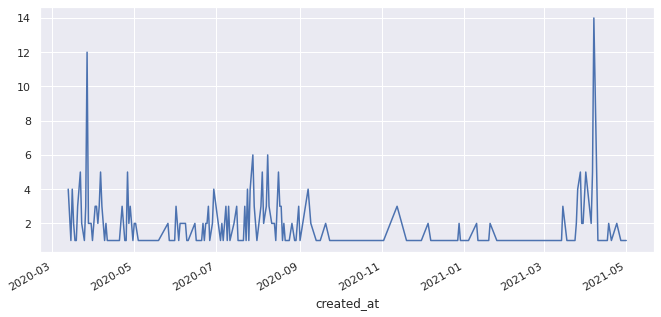

In [11]:
grupo1_time_series = grupo1_time_series.plot()

### Grupo 2

- bombona de oxígeno
- flujometro de oxígeno
- dexametasona

In [12]:
grupo_2 = pd.read_csv('../datos/datos_twitter/twitter_2_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
grupo_2.shape 

(259, 2)

In [13]:
grupo_2.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28 17:26:59+00:00,🚑 El hijo de una amiga sufrió la picadura de u...
1,2021-04-24 13:36:31+00:00,Buenos días quien tenga información exacta y n...
2,2021-04-24 13:34:00+00:00,@VirguezFranklin Reflexione!! Quienes son los...
3,2021-04-24 13:25:07+00:00,Reflexione!! Quienes son los reales genocidas...
4,2021-04-22 14:07:09+00:00,Muchos pagan lo que no tienen por una bombona ...
...,...,...
210,2021-05-07 19:17:29+00:00,@FarmaciaAhinoa Buenas tardes. Por favor me pu...
211,2021-05-05 22:41:11+00:00,Capriles se erige como la gran bombona de oxíg...
221,2021-04-08 19:59:32+00:00,Disponibles para ENTREGA INMEDIATA Regulador d...
233,2021-03-28 00:19:27+00:00,Regulador de Oxigeno Medicinal de 0-15 Lpm con...


In [14]:
grupo2_time_series =  counts_time_series(grupo_2)

En total se extraen 259 tweets, luego de remover los tweets duplicados, queda un total de 215, los cuales se distribuyen de la siguiente manera: 

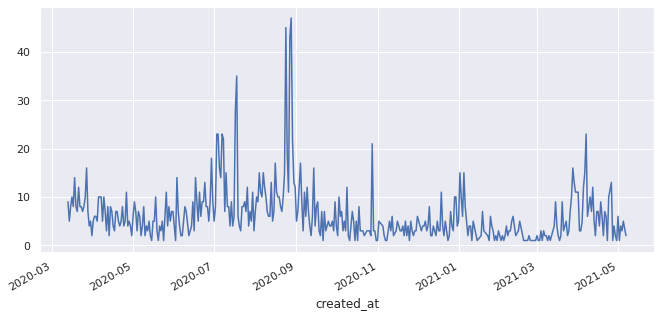

In [15]:
grupo2_time_series = twitter_time_series.plot()

### Grupo 3

- GoFundMe venezuela covid-19
- GoFundMe venezuela covid-19 (con link)
- recolectar dinero covid-19
- ayuda covid-19

In [16]:
grupo_3 = pd.read_csv('../datos/datos_twitter/twitter_3_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
grupo_3.shape

(649, 2)

In [17]:
grupo_3.drop_duplicates(keep='first')

,created_at,text
0,2021-04-13 22:54:38+00:00,Qué horrible que en Venezuela todo está colaps...
1,2021-04-12 19:53:10+00:00,Desde el #1Abr se han abierto 210 campañas de ...
2,2021-04-09 14:42:17+00:00,Venezuela recurre a GoFoundMe para luchar cont...
3,2021-04-06 07:08:20+00:00,My Twitter/Facebook feeds are full of GoFoundM...
4,2021-04-05 17:46:05+00:00,@Simonovis Con Razón eso explicaría que 👉 El T...
...,...,...
644,2021-04-06 03:44:08+00:00,Ayudemos a mi padrino Hector a superar el COVI...
645,2021-04-04 18:00:02+00:00,Agradecido con el llamado de solidaridad en co...
646,2021-04-04 03:55:58+00:00,@R_MarcoTorres @NicolasMaduro @johanitakenpo @...
647,2021-04-04 01:26:45+00:00,1607 casos reconoce el gobierno de Maduro hoy ...


In [18]:
grupo_3_time_series =  counts_time_series(grupo_3)

En total se extraen 649 tweets, luego de remover los tweets duplicados, queda un total de 642, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:xlabel='created_at'>

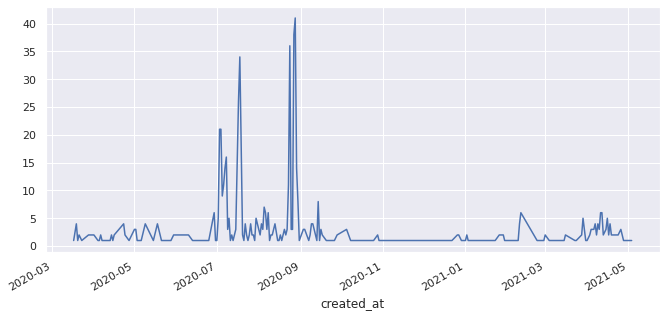

In [19]:
grupo_3_time_series.plot()

### Grupo 4

- #serviciopublico covid-19
- #serviciopublico covid-19

In [20]:
grupo_4 = pd.read_csv('../datos/datos_twitter/twitter_4_grupo.csv', parse_dates=['created_at']) 
grupo_4.shape 

(906, 2)

In [21]:
grupo_4.drop_duplicates(keep='first')

,created_at,text
0,2020-07-27 01:15:10+00:00,#ServicioPúblico #Táchira. Se necesita con urg...
1,2020-07-26 17:03:31+00:00,¡Dios Santo!!! Esta es la situación real en #V...
2,2020-07-26 12:37:41+00:00,#ServicioPúblico https://t.co/sW2kSphw8K
3,2020-07-25 22:36:23+00:00,#ServicioPublico\nSi está en tus posibilidades...
4,2020-07-25 19:59:04+00:00,#ServicioPúblico https://t.co/OS8F7Aa9He
...,...,...
900,2021-03-14 23:05:39+00:00,#ServicioPublico Recurrimos a tu apoyo y gener...
901,2021-02-06 10:33:15+00:00,#ServicioPúblico Para la abuela del dirigente ...
902,2021-01-31 22:43:00+00:00,#ServicioPúblico: Se necesita para paciente co...
903,2021-01-27 21:09:00+00:00,#ServicioPúblico Paciente recluida en el IHULA...


In [22]:
grupo_4_time_series =  counts_time_series(grupo_4)

En total se extraen 906 tweets, luego de remover los tweets duplicados, queda un total de 891, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

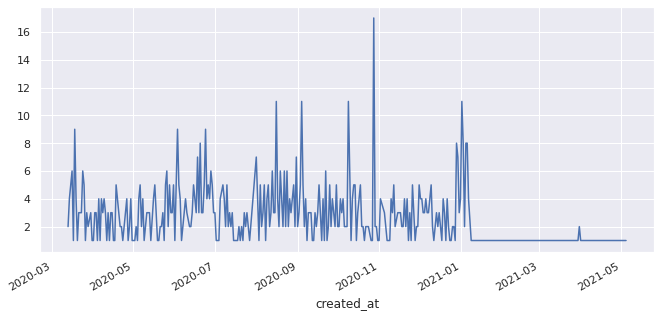

In [23]:
grupo_4_time_series.plot()

### Grupo 5

- UCIS 
- unidad de cuidados intensivos

In [24]:
grupo_5 = pd.read_csv('../datos/datos_twitter/twitter_5_grupo.csv', parse_dates=['created_at'])  
grupo_5.shape 

(76, 2)

In [25]:
grupo_5.drop_duplicates(keep='first')

,created_at,text
0,2021-04-26 12:52:42+00:00,UCI DE PRIMER MUNDO✅👏🏻\n\n@EdwinRojasM: En la ...
1,2021-04-26 12:51:07+00:00,En Vivo 📻 programa La Voz De Sucre 📺\n@EdwinRo...
2,2021-04-23 13:31:15+00:00,Cumpliendo con las orientaciones precisas del ...
3,2021-04-19 13:40:36+00:00,#SALUD | Próximamente se estará inaugurando la...
4,2021-04-19 13:30:46+00:00,El líder sucrense @EdwinRojasM anunció que pr...
...,...,...
71,2021-05-03 14:59:27+00:00,Con una inversión de 180mil millones de Bs\nSe...
72,2021-05-03 14:13:10+00:00,El Gobernador @EdwinRojasM indicó que la unida...
73,2021-05-03 12:11:49+00:00,Gobernador @EdwinRojasM Siempre pensando en su...
74,2021-05-01 16:35:13+00:00,Hermana. El murió primero. En Valencia. Ella m...


In [26]:
grupo_5_time_series =  counts_time_series(grupo_5)

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

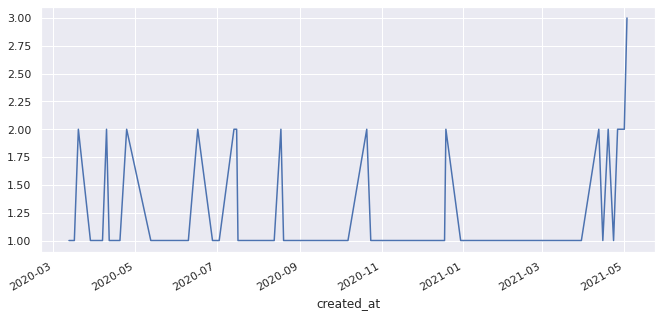

In [27]:
grupo_5_time_series.plot()

### Grupo 6

- tratamiento covid-19 

In [28]:
grupo_6 = pd.read_csv('../datos/datos_twitter/twitter_6_grupo.csv', parse_dates=['created_at']) 
grupo_6.shape

(324, 2)

In [29]:
grupo_6.drop_duplicates(keep='first')

,created_at,text
0,2021-04-29 13:12:42+00:00,Atender a los pacientes con Covid-19 es una tr...
1,2021-04-28 21:17:54+00:00,#28Abr El padre Beltrán Sánchez superó el #Cov...
2,2021-04-26 21:55:49+00:00,#26Abr Al final de la noche del domingo #25Abr...
3,2021-04-26 13:50:57+00:00,Se entegaron 6 nuevos equipos de ventilación m...
4,2021-04-26 10:08:44+00:00,TRATAMIENTO PARA COVID-19 YA VACUNAS YA
...,...,...
319,2020-03-15 20:00:44+00:00,No se deben usar antibióticos como medio de pr...
320,2020-03-14 03:26:41+00:00,#coronapocalypse #coronavirusvenezuela #Covid_...
321,2020-03-13 19:36:45+00:00,"La Cuba ""Castro-Comunista"" a la vanguardia mu..."
322,2020-03-13 02:37:57+00:00,@joselui02124198 Así como han ocultado estadís...


In [30]:
grupo_6_time_series =  counts_time_series(grupo_6)

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

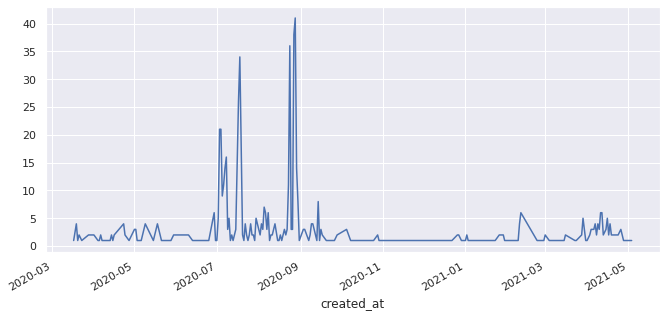

In [31]:
grupo_3_time_series.plot()